In [3]:
from pyspark.sql import SparkSession

In [134]:
spark = SparkSession.builder.appName('Different Types Of Data').getOrCreate()

In [5]:
df = spark.read.format('csv').options(**{'inferSchema': 'true', 'header': 'true'}).load('/home/deepak/programs/python/sparkLearn/data/retail-data/by-day/2010-12-01.csv')

In [6]:
df.show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS S

In [7]:
df.createOrReplaceTempView('dfTable')

In [8]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [9]:
from pyspark.sql.functions import lit, col

In [10]:
df.select(lit(1), 'stockcode').show() #converting literal 1 python type to spark type using lit function

+---+---------+
|  1|stockcode|
+---+---------+
|  1|   85123A|
|  1|    71053|
|  1|   84406B|
|  1|   84029G|
|  1|   84029E|
|  1|    22752|
|  1|    21730|
|  1|    22633|
|  1|    22632|
|  1|    84879|
|  1|    22745|
|  1|    22748|
|  1|    22749|
|  1|    22310|
|  1|    84969|
|  1|    22623|
|  1|    22622|
|  1|    21754|
|  1|    21755|
|  1|    21777|
+---+---------+
only showing top 20 rows


In [11]:
#booleans

df.where(col('invoiceno')=='536365').show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS S

In [12]:
df.where("invoiceno = '536365'").show(10, truncate=False) # condition as expression

+---------+---------+-----------------------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+-------------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |2010-12-01 08:26:00|2.55     |17850.0   |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |2010-12-01 08:26:00|2.75     |17850.0   |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |2010-12-01 08:26:00|3.39     |17850.0   |United Kingdom|
|536365   |22752

In [13]:
from pyspark.sql.functions import instr

In [14]:
priceFilter = col('unitprice') > 610
descFilter = instr(col('description'), 'POSTAGE') >= 1
descFilter1 = col('description').ilike('postage')

df.where(col('stockcode').isin('DOT') | (priceFilter & descFilter1)).show(truncate=False)

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description   |Quantity|InvoiceDate        |UnitPrice|CustomerID|Country       |
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|536544   |DOT      |DOTCOM POSTAGE|1       |2010-12-01 14:32:00|569.77   |NULL      |United Kingdom|
|536592   |DOT      |DOTCOM POSTAGE|1       |2010-12-01 17:06:00|607.49   |NULL      |United Kingdom|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+



In [15]:
spark.sql("""
select * from dftable
          where stockcode in ("DOT") or (unitprice > 610 and description ilike '%postage%')
""").show()

+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|   Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+
|   536544|      DOT|DOTCOM POSTAGE|       1|2010-12-01 14:32:00|   569.77|      NULL|United Kingdom|
|   536592|      DOT|DOTCOM POSTAGE|       1|2010-12-01 17:06:00|   607.49|      NULL|United Kingdom|
+---------+---------+--------------+--------+-------------------+---------+----------+--------------+



In [16]:
df.select(col('_metadata'), col('_metadata.file_path')).show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+
|_metadata                                                                                                                                    |file_path                                                                          |
+---------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+
|{file:/home/deepak/programs/python/sparkLearn/data/retail-data/by-day/2010-12-01.csv, 2010-12-01.csv, 275001, 0, 275001, 2019-09-12 21:08:39}|file:/home/deepak/programs/python/sparkLearn/data/retail-data/by-day/2010-12-01.csv|
|{file:/home/deepak/programs/python/sparkLearn/data/retail-data/by-day/2010-12-01.csv, 2

In [17]:
# Numbers

from pyspark.sql.functions import pow, round, monotonically_increasing_id

In [18]:
df.columns

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [19]:
p = round(pow(col('unitprice')*col('quantity'), 2), 3)

df.select(p, monotonically_increasing_id()).show()

+------------------------------------------+-----------------------------+
|round(POWER((unitprice * quantity), 2), 3)|monotonically_increasing_id()|
+------------------------------------------+-----------------------------+
|                                    234.09|                            0|
|                                   413.716|                            1|
|                                     484.0|                            2|
|                                   413.716|                            3|
|                                   413.716|                            4|
|                                    234.09|                            5|
|                                    650.25|                            6|
|                                    123.21|                            7|
|                                    123.21|                            8|
|                                  2924.646|                            9|
|                        

In [20]:
# strings
from pyspark.sql.functions import initcap, upper, lower, ltrim, rtrim, trim

In [21]:
df.select(
    upper(lit('deepak')),
    lower(lit('Deepak')),
    initcap(lit('deePak rEddy')),
    ltrim(lit('   Deepak Reddy')),
    rtrim(lit('Deepak Reddy    '))
).show()

+-------------+-------------+---------------------+----------------------+-----------------------+
|upper(deepak)|lower(Deepak)|initcap(deePak rEddy)|ltrim(   Deepak Reddy)|rtrim(Deepak Reddy    )|
+-------------+-------------+---------------------+----------------------+-----------------------+
|       DEEPAK|       deepak|         Deepak Reddy|          Deepak Reddy|           Deepak Reddy|
|       DEEPAK|       deepak|         Deepak Reddy|          Deepak Reddy|           Deepak Reddy|
|       DEEPAK|       deepak|         Deepak Reddy|          Deepak Reddy|           Deepak Reddy|
|       DEEPAK|       deepak|         Deepak Reddy|          Deepak Reddy|           Deepak Reddy|
|       DEEPAK|       deepak|         Deepak Reddy|          Deepak Reddy|           Deepak Reddy|
|       DEEPAK|       deepak|         Deepak Reddy|          Deepak Reddy|           Deepak Reddy|
|       DEEPAK|       deepak|         Deepak Reddy|          Deepak Reddy|           Deepak Reddy|
|       DE

In [22]:
## Regex - regex_replace, regexp_extract

In [23]:
from pyspark.sql.functions import locate, col, expr

In [24]:
df.select('description', locate('WHITE', 'description', 1)).show(truncate=False)

+-----------------------------------+-----------------------------+
|description                        |locate(WHITE, description, 1)|
+-----------------------------------+-----------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER |1                            |
|WHITE METAL LANTERN                |1                            |
|CREAM CUPID HEARTS COAT HANGER     |0                            |
|KNITTED UNION FLAG HOT WATER BOTTLE|0                            |
|RED WOOLLY HOTTIE WHITE HEART.     |19                           |
|SET 7 BABUSHKA NESTING BOXES       |0                            |
|GLASS STAR FROSTED T-LIGHT HOLDER  |0                            |
|HAND WARMER UNION JACK             |0                            |
|HAND WARMER RED POLKA DOT          |0                            |
|ASSORTED COLOUR BIRD ORNAMENT      |0                            |
|POPPY'S PLAYHOUSE BEDROOM          |0                            |
|POPPY'S PLAYHOUSE KITCHEN          |0          

In [25]:
def locate_color(column, color):
    return locate(color, column).cast('boolean').alias('is_'+color)

In [26]:
simpleColors = ["black", "white", "red", "green", "blue"]
selectedColumns = [locate_color('description', c.upper()) for c in simpleColors]
selectedColumns.append(expr('*'))
df.select(*selectedColumns).withColumn('hasSimpleColors', expr('is_black or is_white')).where('hasSimpleColors').show()

+--------+--------+------+--------+-------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+---------------+
|is_BLACK|is_WHITE|is_RED|is_GREEN|is_BLUE|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|hasSimpleColors|
+--------+--------+------+--------+-------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+---------------+
|   false|    true| false|   false|  false|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|           true|
|   false|    true| false|   false|  false|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|           true|
|   false|    true|  true|   false|  false|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|           true|
|   

In [27]:
# Date(just date) and Timestamps(date and time)

In [28]:
# working with dates and timestamps closely relates to
# working with strings because we often store our timestamps or dates as
# strings and convert them into date types at runtime.

# This is less common
# when working with databases and structured data but much more common
# when we are working with text and CSV files.

In [29]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
from pyspark.sql.functions import now, current_timestamp, current_date, current_timezone

In [ ]:
df_ts = spark.range(10)

df_ts.\
withColumn('now', now()).\
withColumn('curr_date', current_date()).\
withColumn('curr_ts', current_timestamp()).\
withColumn('curr_tz', current_timezone()).\
show(truncate=False)

# datediff
# months_between
# date_add
# date_sub
# to_date and to_timestamp convert string to date and timestamps

+---+--------------------------+----------+--------------------------+------------+
|id |now                       |curr_date |curr_ts                   |curr_tz     |
+---+--------------------------+----------+--------------------------+------------+
|0  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/Kolkata|
|1  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/Kolkata|
|2  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/Kolkata|
|3  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/Kolkata|
|4  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/Kolkata|
|5  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/Kolkata|
|6  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/Kolkata|
|7  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/Kolkata|
|8  |2025-10-03 11:53:59.474899|2025-10-03|2025-10-03 11:53:59.474899|Asia/K

In [ ]:
# working with null values

# coalease(col1, col2) returns the first non null value
# ifnull(null, col2) if null select second value
# nullif returns null if two values are equal else returns second col
# nvl returns the second value if first is null defaults to first
# nvl2 returns the second value if the first is not null; otherwise, it will return the last specified value

In [39]:
spark.sql("""
SELECT
ifnull(null, 'return_value'),
nullif('value', 'value'),
nvl(null, 'return_value'),
nvl2('not_null', 'return_value', "else_value")
FROM dfTable LIMIT 1
""").show()

+--------------------------+--------------------+-----------------------+----------------------------------------+
|ifnull(NULL, return_value)|nullif(value, value)|nvl(NULL, return_value)|nvl2(not_null, return_value, else_value)|
+--------------------------+--------------------+-----------------------+----------------------------------------+
|              return_value|                NULL|           return_value|                            return_value|
+--------------------------+--------------------+-----------------------+----------------------------------------+



In [ ]:
#drop rows if null

df.na.drop() #default to any 

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

In [41]:
df.na.fill('all', subset=['StockCode', 'Invoiceno'])

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

In [42]:
df.na.replace([""], ['Unknown'], 'description')

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

In [43]:
## working with complex types

In [48]:
complexDf = df.selectExpr("(Description, InvoiceNo) as complex", "*")
complexDf.createOrReplaceTempView('complexDF')

In [54]:
complexDf.select('complex.description', 'complex.invoiceno', 'complex.*', col('complex').getField('description')).show(truncate=False)

+-----------------------------------+---------+-----------------------------------+---------+-----------------------------------+
|description                        |invoiceno|Description                        |InvoiceNo|complex.description                |
+-----------------------------------+---------+-----------------------------------+---------+-----------------------------------+
|WHITE HANGING HEART T-LIGHT HOLDER |536365   |WHITE HANGING HEART T-LIGHT HOLDER |536365   |WHITE HANGING HEART T-LIGHT HOLDER |
|WHITE METAL LANTERN                |536365   |WHITE METAL LANTERN                |536365   |WHITE METAL LANTERN                |
|CREAM CUPID HEARTS COAT HANGER     |536365   |CREAM CUPID HEARTS COAT HANGER     |536365   |CREAM CUPID HEARTS COAT HANGER     |
|KNITTED UNION FLAG HOT WATER BOTTLE|536365   |KNITTED UNION FLAG HOT WATER BOTTLE|536365   |KNITTED UNION FLAG HOT WATER BOTTLE|
|RED WOOLLY HOTTIE WHITE HEART.     |536365   |RED WOOLLY HOTTIE WHITE HEART.     |536365 

In [55]:
# Arrays
from pyspark.sql.functions import split
df.select(split(col("Description"), " ")).show(2)

+-------------------------+
|split(Description,  , -1)|
+-------------------------+
|     [WHITE, HANGING, ...|
|     [WHITE, METAL, LA...|
+-------------------------+
only showing top 2 rows


In [56]:
df.select(split(col("Description"), " ").alias('arrayCol')).selectExpr('arrayCol[0]').show()

+-----------+
|arrayCol[0]|
+-----------+
|      WHITE|
|      WHITE|
|      CREAM|
|    KNITTED|
|        RED|
|        SET|
|      GLASS|
|       HAND|
|       HAND|
|   ASSORTED|
|    POPPY'S|
|    POPPY'S|
|  FELTCRAFT|
|      IVORY|
|        BOX|
|        BOX|
|        BOX|
|       HOME|
|       LOVE|
|     RECIPE|
+-----------+
only showing top 20 rows


In [57]:
from pyspark.sql.functions import size
df.select(size(split(col("Description"), " "))).show(2)

+-------------------------------+
|size(split(Description,  , -1))|
+-------------------------------+
|                              5|
|                              3|
+-------------------------------+
only showing top 2 rows


In [58]:
from pyspark.sql.functions import array_contains
df.select(array_contains(split(col("Description"), " "),
"WHITE")).show(2)

+------------------------------------------------+
|array_contains(split(Description,  , -1), WHITE)|
+------------------------------------------------+
|                                            true|
|                                            true|
+------------------------------------------------+
only showing top 2 rows


In [62]:
from pyspark.sql.functions import split, explode
df.withColumn("splitted", split(col("Description"), " "))\
.withColumn("exploded", explode(col("splitted")))\
.select("Description", "InvoiceNo", "exploded").show(truncate=False)

+-----------------------------------+---------+--------+
|Description                        |InvoiceNo|exploded|
+-----------------------------------+---------+--------+
|WHITE HANGING HEART T-LIGHT HOLDER |536365   |WHITE   |
|WHITE HANGING HEART T-LIGHT HOLDER |536365   |HANGING |
|WHITE HANGING HEART T-LIGHT HOLDER |536365   |HEART   |
|WHITE HANGING HEART T-LIGHT HOLDER |536365   |T-LIGHT |
|WHITE HANGING HEART T-LIGHT HOLDER |536365   |HOLDER  |
|WHITE METAL LANTERN                |536365   |WHITE   |
|WHITE METAL LANTERN                |536365   |METAL   |
|WHITE METAL LANTERN                |536365   |LANTERN |
|CREAM CUPID HEARTS COAT HANGER     |536365   |CREAM   |
|CREAM CUPID HEARTS COAT HANGER     |536365   |CUPID   |
|CREAM CUPID HEARTS COAT HANGER     |536365   |HEARTS  |
|CREAM CUPID HEARTS COAT HANGER     |536365   |COAT    |
|CREAM CUPID HEARTS COAT HANGER     |536365   |HANGER  |
|KNITTED UNION FLAG HOT WATER BOTTLE|536365   |KNITTED |
|KNITTED UNION FLAG HOT WATER B

In [ ]:
# Maps
from pyspark.sql.functions import create_map
df.select(create_map(col("Description"),col("InvoiceNo")).alias("complex_map"))\
.show(truncate=False)

+-----------------------------------------------+
|complex_map                                    |
+-----------------------------------------------+
|{WHITE HANGING HEART T-LIGHT HOLDER -> 536365} |
|{WHITE METAL LANTERN -> 536365}                |
|{CREAM CUPID HEARTS COAT HANGER -> 536365}     |
|{KNITTED UNION FLAG HOT WATER BOTTLE -> 536365}|
|{RED WOOLLY HOTTIE WHITE HEART. -> 536365}     |
|{SET 7 BABUSHKA NESTING BOXES -> 536365}       |
|{GLASS STAR FROSTED T-LIGHT HOLDER -> 536365}  |
|{HAND WARMER UNION JACK -> 536366}             |
|{HAND WARMER RED POLKA DOT -> 536366}          |
|{ASSORTED COLOUR BIRD ORNAMENT -> 536367}      |
|{POPPY'S PLAYHOUSE BEDROOM  -> 536367}         |
|{POPPY'S PLAYHOUSE KITCHEN -> 536367}          |
|{FELTCRAFT PRINCESS CHARLOTTE DOLL -> 536367}  |
|{IVORY KNITTED MUG COSY  -> 536367}            |
|{BOX OF 6 ASSORTED COLOUR TEASPOONS -> 536367} |
|{BOX OF VINTAGE JIGSAW BLOCKS  -> 536367}      |
|{BOX OF VINTAGE ALPHABET BLOCKS -> 536367}     |


In [67]:
df.select(create_map(col("Description"),col("InvoiceNo")).alias("complex_map"))\
.selectExpr("complex_map['WHITE METAL LANTERN']").show(2)

+--------------------------------+
|complex_map[WHITE METAL LANTERN]|
+--------------------------------+
|                            NULL|
|                          536365|
+--------------------------------+
only showing top 2 rows


In [70]:
df.select(create_map(col("Description"),col("InvoiceNo")).alias("complex_map"))\
.selectExpr("explode(complex_map)").show(truncate=False) #explode maps it will return in columns

+-----------------------------------+------+
|key                                |value |
+-----------------------------------+------+
|WHITE HANGING HEART T-LIGHT HOLDER |536365|
|WHITE METAL LANTERN                |536365|
|CREAM CUPID HEARTS COAT HANGER     |536365|
|KNITTED UNION FLAG HOT WATER BOTTLE|536365|
|RED WOOLLY HOTTIE WHITE HEART.     |536365|
|SET 7 BABUSHKA NESTING BOXES       |536365|
|GLASS STAR FROSTED T-LIGHT HOLDER  |536365|
|HAND WARMER UNION JACK             |536366|
|HAND WARMER RED POLKA DOT          |536366|
|ASSORTED COLOUR BIRD ORNAMENT      |536367|
|POPPY'S PLAYHOUSE BEDROOM          |536367|
|POPPY'S PLAYHOUSE KITCHEN          |536367|
|FELTCRAFT PRINCESS CHARLOTTE DOLL  |536367|
|IVORY KNITTED MUG COSY             |536367|
|BOX OF 6 ASSORTED COLOUR TEASPOONS |536367|
|BOX OF VINTAGE JIGSAW BLOCKS       |536367|
|BOX OF VINTAGE ALPHABET BLOCKS     |536367|
|HOME BUILDING BLOCK WORD           |536367|
|LOVE BUILDING BLOCK WORD           |536367|
|RECIPE BO

In [ ]:
## Working with JSON

# Spark has some unique support for working with JSON data. You can
# operate directly on strings of JSON in Spark and parse from JSON or
# extract JSON objects

In [72]:
jsonDF = spark.range(1).selectExpr("""
'{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}' as
jsonString""")

In [75]:
jsonDF.schema

StructType([StructField('jsonString', StringType(), False)])

In [77]:
jsonDF.show(truncate=False)

+-------------------------------------------+
|jsonString                                 |
+-------------------------------------------+
|{"myJSONKey" : {"myJSONValue" : [1, 2, 3]}}|
+-------------------------------------------+



In [78]:
# get_json_object to inline query a JSON object, be it
# a dictionary or array. Use json_tuple if this object has only
# one level of nesting

In [79]:
from pyspark.sql.functions import get_json_object, json_tuple

In [86]:
jsonDF.select(get_json_object('jsonstring', '$.myJSONKey.myJSONValue[0]'), json_tuple(col("jsonString"), "myJSONKey")).show()

+-------------------------------------------------------+--------------------+
|get_json_object(jsonstring, $.myJSONKey.myJSONValue[0])|                  c0|
+-------------------------------------------------------+--------------------+
|                                                      1|{"myJSONValue":[1...|
+-------------------------------------------------------+--------------------+



In [ ]:
from pyspark.sql.functions import from_json, to_json
from pyspark.sql.types import *

parseSchema = StructType((
    StructField("InvoiceNo",StringType(),True),
    StructField("Description",StringType(),True))
)
df.selectExpr("(InvoiceNo, Description) as myStruct")\
    .select(to_json(col("myStruct")).alias("newJSON"))\
    .select(from_json(col("newJSON"), parseSchema),col("newJSON")).show(2, truncate=False)

# to_json converts a struct to JSON string
# from_json converts a JSON string to a struct

+--------------------------------------------+-------------------------------------------------------------------------+
|from_json(newJSON)                          |newJSON                                                                  |
+--------------------------------------------+-------------------------------------------------------------------------+
|{536365, WHITE HANGING HEART T-LIGHT HOLDER}|{"InvoiceNo":"536365","Description":"WHITE HANGING HEART T-LIGHT HOLDER"}|
|{536365, WHITE METAL LANTERN}               |{"InvoiceNo":"536365","Description":"WHITE METAL LANTERN"}               |
+--------------------------------------------+-------------------------------------------------------------------------+
only showing top 2 rows


## UDFs (User-Defined Functions) in Spark

- **Purpose**: Enable custom transformations using Python, Scala, or Java, with support for external libraries.

### Execution Model
- Spark serializes the UDF on the driver and distributes it to executors.
- Execution differs by language:

#### Scala/Java UDFs
- Run inside the **JVM**.
- **Pros**: Low overhead, no cross-language serialization.
- **Cons**: Cannot leverage Spark’s built-in code generation optimizations.
- Risk of performance issues if many objects are created.

#### Python UDFs
- Spark spawns a **separate Python process** on each worker.
- Data is serialized **JVM → Python**.
- UDF executes **row by row** in Python.
- Results are serialized back **Python → JVM → Spark**.
- **Cons**: Significant overhead due to serialization and process switching.

---

⚡ **Key Point**:  
Scala/Java UDFs are more efficient than Python UDFs.  
Whenever possible, prefer Spark’s **built-in functions** or **Pandas UDFs** for better performance.

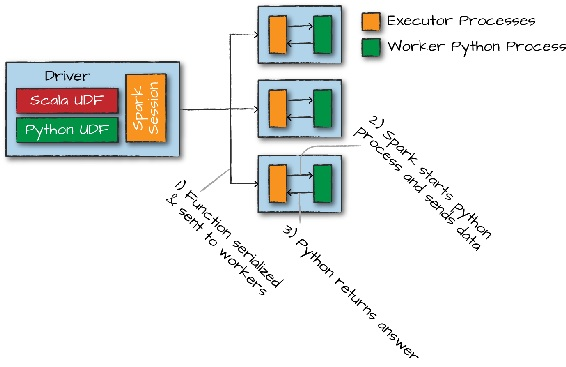

- Starting this Python process is expensive, but the real cost is in serializing the data to
Python. This is costly for two reasons: it is an expensive computation, but also, after
the data enters Python, Spark cannot manage the memory of the worker. This means
that you could potentially cause a worker to fail if it becomes resource constrained
(because both the JVM and Python are competing for memory on the same machine).
We recommend that you write your UDFs in Scala or Java—the small amount of time
it should take you to write the function in Scala will always yield significant speed
ups, and on top of that, you can still use the function from Python!

In [ ]:
def power(col):
    return col ** 3

from pyspark.sql.functions import udf

UDFPower = udf(power) #register the function as python udf 

In [98]:
UDFExample = spark.range(10000).toDF('NUM')

In [107]:
UDFExample.select(UDFPower('NUM')).explain(mode='formatted')

== Physical Plan ==
* Project (3)
+- BatchEvalPython (2)
   +- * Range (1)


(1) Range [codegen id : 1]
Output [1]: [id#854L]
Arguments: Range (0, 10000, step=1, splits=Some(8))

(2) BatchEvalPython
Input [1]: [id#854L]
Arguments: [power(id#854L)#882], [pythonUDF0#884]

(3) Project [codegen id : 2]
Output [1]: [pythonUDF0#884 AS power(NUM)#883]
Input [2]: [id#854L, pythonUDF0#884]




In [ ]:
spark.udf.register("power3", power, IntegerType()) #register as sql udf

# When integers are operated on
# in Python, Python won’t convert them into floats (the corresponding type
# to Spark’s double type), therefore we see null.

25/10/03 15:30:50 WARN SimpleFunctionRegistry: The function power3 replaced a previously registered function.


<function __main__.power(col)>

In [117]:
UDFExample.selectExpr('power3(num)').show()

+-----------+
|power3(num)|
+-----------+
|          0|
|          1|
|          8|
|         27|
|         64|
|        125|
|        216|
|        343|
|        512|
|        729|
|       1000|
|       1331|
|       1728|
|       2197|
|       2744|
|       3375|
|       4096|
|       4913|
|       5832|
|       6859|
+-----------+
only showing top 20 rows


In [131]:
!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 1.3 MB/s eta 0:00:0000:0100:010m


In [137]:
#pandas udf
from pyspark.sql.functions import pandas_udf

@pandas_udf('double')
def power(col):
    return col ** 3

spark.range(1000).toDF('NUM').select(power('NUM')).show()

+----------+
|power(NUM)|
+----------+
|       0.0|
|       1.0|
|       8.0|
|      27.0|
|      64.0|
|     125.0|
|     216.0|
|     343.0|
|     512.0|
|     729.0|
|    1000.0|
|    1331.0|
|    1728.0|
|    2197.0|
|    2744.0|
|    3375.0|
|    4096.0|
|    4913.0|
|    5832.0|
|    6859.0|
+----------+
only showing top 20 rows


In [75]:
spark.sql('drop table `spark_catalog`.`default`.`flights`')

DataFrame[]

In [ ]:
spark.stop()

In [76]:
spark.sql("""
CREATE TABLE flights (
DEST_COUNTRY_NAME STRING, ORIGIN_COUNTRY_NAME STRING, count
LONG)
USING JSON OPTIONS (path '/home/deepak/programs/python/sparkLearn/data/flight-data/json/2015-summary.json')
""")

DataFrame[]

In [81]:
spark.sql("""
show tables
""").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|  default|  flights|      false|
|         |  dftable|       true|
+---------+---------+-----------+



In [82]:
spark.sql("DESCRIBE EXTENDED flights").show(truncate=False)


+----------------------------+------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                           |comment|
+----------------------------+------------------------------------------------------------------------------------+-------+
|DEST_COUNTRY_NAME           |string                                                                              |NULL   |
|ORIGIN_COUNTRY_NAME         |string                                                                              |NULL   |
|count                       |bigint                                                                              |NULL   |
|                            |                                                                                    |       |
|# Detailed Table Information|                                                                                    |       |
|Catalog

In [78]:
spark.sql("""
select * from flights
""").show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [83]:
spark.conf.get("spark.sql.catalogImplementation")


'in-memory'